### Star Wars Legos Image Classification with total five classes using Convolutional Neural Networks

In [1]:
# Importing necessary libraries
import os
import math
import random
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
BASE_DIR = "/content/drive/MyDrive/Data Science WorkSpace/Tensorflow tutorials/Lego MiniFigures Image Classification/star-wars-images/"
names = ['YODA', 'LUKE SKYWALKER', 'R2-D2', 'MACE WINDU', 'GENERAL GRIEVOUS']
tf.random.set_seed(1)

In [6]:
# Generate batches of tensor image data with real-time data augmentation

#preprocessing function
# rescale = 1./255
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)                                                         
valid_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batches = train_gen.flow_from_directory(
    BASE_DIR + '/train',
    target_size=(256, 256),
    class_mode = 'sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

val_batches = valid_gen.flow_from_directory(
    BASE_DIR + '/val',
    target_size=(256, 256),
    class_mode = 'sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    BASE_DIR + '/test',
    target_size=(256, 256),
    class_mode = 'sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names 
)

Found 37 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [7]:
train_batch = train_batches[0]
print(train_batch[0].shape)
print(train_batch[1])
test_batch = test_batches[0]
print(test_batch[0].shape)
print(test_batch[1])

(4, 256, 256, 3)
[1. 2. 4. 4.]
(4, 256, 256, 3)
[0. 0. 1. 1.]


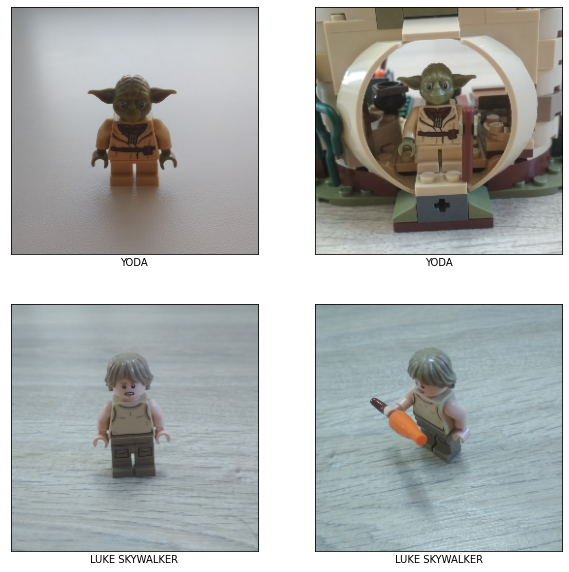

In [8]:
def show(batch, pred_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(batch[0][i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, hence need of extra index
        lbl = names[int(batch[1][i])]
        if pred_labels is not None:
            lbl += "/ Pred:" + names[int(pred_labels[i])]
        plt.xlabel(lbl)
    plt.show()

show(test_batch)

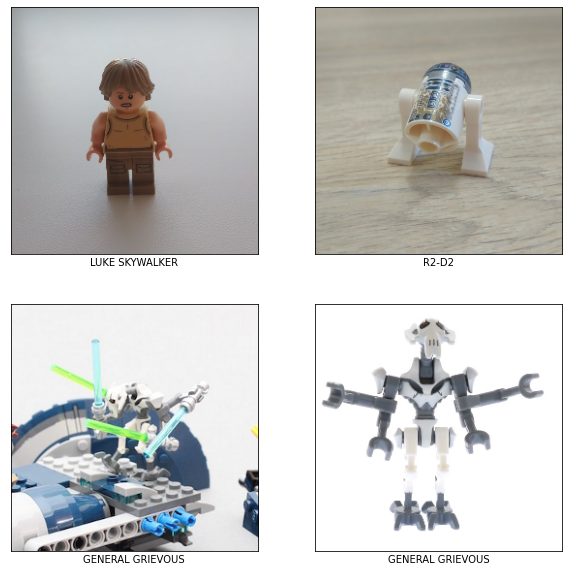

In [9]:
show(train_batch)

In [13]:
# preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
vgg_model = tf.keras.applications.vgg16.VGG16()
print(type(vgg_model))
vgg_model.summary()

553476096/553467096 [==============================] - 2s 0us/step
<class 'keras.engine.functional.Functional'>
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
               

In [14]:
model = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
    model.add(layer)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [16]:
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [17]:
model.add(layers.Dense(5))

In [18]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [19]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [20]:
# Generate batches of tensor image data with real-time augmentation.

train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)                                                         
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    BASE_DIR + '/train',
    target_size=(224, 224),
    class_mode = 'sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

val_batches = valid_gen.flow_from_directory(
    BASE_DIR + '/val',
    target_size=(224, 224),
    class_mode = 'sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    BASE_DIR + '/test',
    target_size=(224, 224),
    class_mode = 'sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names 
)

Found 37 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [21]:
# training
epochs = 30

# callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2
)

history = model.fit(train_batches, validation_data = val_batches, 
                    callbacks = [early_stopping],
                    epochs = epochs, verbose=2)

Epoch 1/30
10/10 - 21s - loss: 1.3482 - accuracy: 0.4595 - val_loss: 1.0362 - val_accuracy: 0.6875 - 21s/epoch - 2s/step
Epoch 2/30
10/10 - 20s - loss: 0.1337 - accuracy: 0.9730 - val_loss: 1.0005 - val_accuracy: 0.6875 - 20s/epoch - 2s/step
Epoch 3/30
10/10 - 20s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.8202 - val_accuracy: 0.7500 - 20s/epoch - 2s/step
Epoch 4/30
10/10 - 19s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.7634 - val_accuracy: 0.8125 - 19s/epoch - 2s/step
Epoch 5/30
10/10 - 20s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.7313 - val_accuracy: 0.8125 - 20s/epoch - 2s/step
Epoch 6/30
10/10 - 20s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7134 - val_accuracy: 0.8125 - 20s/epoch - 2s/step
Epoch 7/30
10/10 - 20s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7031 - val_accuracy: 0.8125 - 20s/epoch - 2s/step
Epoch 8/30
10/10 - 19s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6972 - val_accuracy: 0.8125 - 19s/epoch - 2s/step
Epoch 9/30
10/10 - 19s - loss: 9

In [22]:
# save the model
model.save("lego_model2.h5")

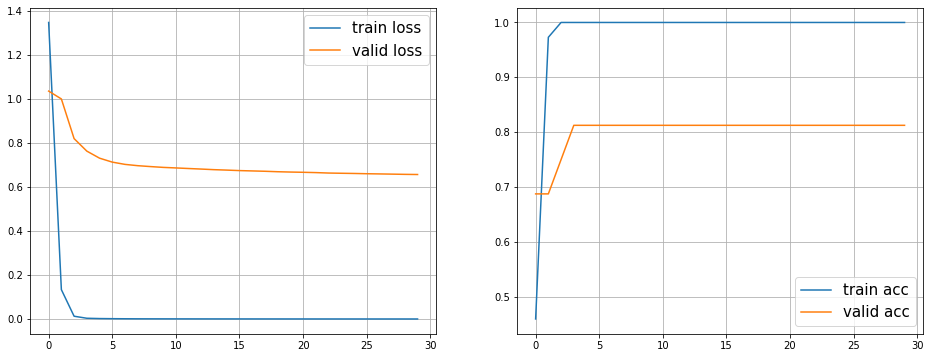

In [23]:
# plot loss and accuracy
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.grid()
plt.legend(fontsize=15)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='valid acc')
plt.grid()
plt.legend(fontsize=15);

In [24]:
model.evaluate(test_batches, verbose=2)

3/3 - 4s - loss: 1.1340 - accuracy: 0.7000 - 4s/epoch - 1s/step


[1.1339823007583618, 0.699999988079071]

In [25]:
predictions = model.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

print(test_batches[0][1])
print(labels[0:4])

[0. 0. 1. 1.]
[0 2 1 0]
